In [4]:
import pandas as pd

df = pd.read_csv('Datos_Breast_Cancer.csv', sep = ',', encoding = 'latin1')

df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True,10011_270344397.png
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False,10011_541722628.png
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False,10011_1031443799.png
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False,10025_562340703.png
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False,10025_1365269360.png


# Preprocesado

In [5]:
df = df.dropna()

In [6]:
# Definir el diccionario de mapeo
lateralidad = {'L':1, 'R':2}
vista = {'CC':1, 'MLO':2, 'ML':3, 'LM':3, 'AT':4, 'LMO':2}
densidad = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

# Aplicar el mapeo a las columnas

df['laterality'] = df['laterality'].replace(lateralidad)
df['view'] = df['view'].replace(vista)
df['density'] = df['density'].replace(densidad)

In [7]:
df['difficult_negative_case'] = df['difficult_negative_case'].astype(int)

In [8]:
len(df)

23647

# Matriz Correlacion

In [9]:
corr_df = df.corr()

<AxesSubplot:>

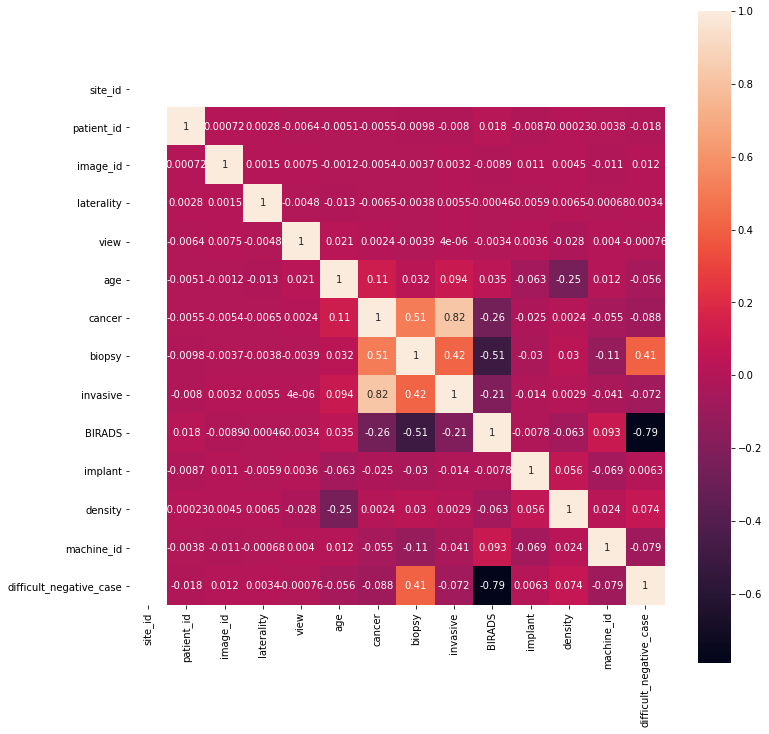

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax)

In [12]:
X = df.drop(['site_id','patient_id','image_id', 'machine_id', 'cancer', 'image_zip'], axis=1)
y = df['cancer']

# PCA

Reducir dimensiones del problema

In [13]:
DF = X.transpose()
DF


,12,13,14,15,16,17,18,19,20,28,...,54694,54695,54696,54697,54698,54699,54700,54701,54704,54705
laterality,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
view,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0
age,60.0,60.0,60.0,60.0,51.0,51.0,51.0,51.0,51.0,52.0,...,42.0,42.0,42.0,42.0,43.0,43.0,43.0,43.0,60.0,60.0
biopsy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
invasive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIRADS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
implant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
density,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
difficult_negative_case,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Estandarizar los datos --> rangos homogeneos

In [14]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
x = scaler.fit(X)
x1 = scaler.transform(X)

In [16]:
columnas = X.columns.values
df_new = pd.DataFrame(x1, columns = columnas) 
df_new

,laterality,view,age,biopsy,invasive,BIRADS,implant,density,difficult_negative_case
0,-1.004960,0.961282,0.245806,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
1,-1.004960,-1.022957,0.245806,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
2,0.995064,0.961282,0.245806,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
3,0.995064,-1.022957,0.245806,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
4,-1.004960,-1.022957,-0.554996,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
...,...,...,...,...,...,...,...,...,...
23642,-1.004960,0.961282,-1.266821,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
23643,0.995064,-1.022957,-1.266821,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
23644,0.995064,0.961282,-1.266821,-0.332416,-0.139281,0.257814,-0.23394,0.794617,-0.517822
23645,0.995064,0.961282,0.245806,-0.332416,-0.139281,-1.527405,-0.23394,0.794617,1.931165


Matriz de covarianza en la que podremos ver la relación entre variables.\
También nos servirá para calcular los autovalores y autovectores.

In [17]:
covarianza = df_new.cov()
covarianza

,laterality,view,age,biopsy,invasive,BIRADS,implant,density,difficult_negative_case
laterality,1.000042,-0.004810,-0.013196,-0.003764,0.005501,-0.000461,-0.005924,0.006517,0.003445
view,-0.004810,1.000042,0.021319,-0.003944,0.000004,-0.003360,0.003568,-0.027906,-0.000761
age,-0.013196,0.021319,1.000042,0.032499,0.094084,0.035274,-0.063168,-0.247050,-0.055995
biopsy,-0.003764,-0.003944,0.032499,1.000042,0.419012,-0.507756,-0.029996,0.030227,0.412240
invasive,0.005501,0.000004,0.094084,0.419012,1.000042,-0.212747,-0.014443,0.002913,-0.072126
BIRADS,-0.000461,-0.003360,0.035274,-0.507756,-0.212747,1.000042,-0.007761,-0.063310,-0.790957
implant,-0.005924,0.003568,-0.063168,-0.029996,-0.014443,-0.007761,1.000042,0.055919,0.006331
density,0.006517,-0.027906,-0.247050,0.030227,0.002913,-0.063310,0.055919,1.000042,0.073881
difficult_negative_case,0.003445,-0.000761,-0.055995,0.412240,-0.072126,-0.790957,0.006331,0.073881,1.000042


Necesitamos conocer los autovalores para poder saber qué porcentaje de información nos da cada componente, para ello aplicamos el método linalg.eig, con el cual obtendremos primero los autovalores y después los autovectores:

In [18]:
import numpy as np

In [19]:
autov = np.linalg.eig(covarianza)
autov

(array([2.24162867, 0.15885849, 0.44689993, 1.34156111, 0.74186067,
        1.10178853, 0.96456291, 0.9949438 , 1.00827651]),
 array([[-2.00556866e-03,  4.45769122e-03, -1.16249592e-02,
         -2.81030690e-02, -2.03966474e-02,  7.02221627e-02,
          2.10659827e-01,  7.15211240e-01, -6.61664060e-01],
        [ 2.63391964e-03, -2.94852141e-03, -8.14434729e-03,
          7.63459376e-02, -1.31546838e-02, -1.79215382e-01,
         -3.98936058e-01,  6.78677218e-01,  5.84846469e-01],
        [ 2.62181909e-02,  1.30172593e-02, -1.08214851e-02,
          6.12229670e-01, -7.17647175e-01, -2.43817109e-01,
          2.21056017e-01, -2.72210749e-02,  1.13966389e-02],
        [-5.13916263e-01,  5.60096881e-02, -7.89158184e-01,
          2.12264580e-01,  8.54248883e-02,  2.37347318e-01,
         -3.08124484e-02, -8.91447591e-04,  1.85670595e-02],
        [-2.43729839e-01, -2.59514126e-01,  4.72316040e-01,
          4.36861696e-01,  1.13673536e-01,  6.61188624e-01,
         -4.25913649e-02,  4.4

In [20]:
autovectores = autov[1]
autovectores

array([[-2.00556866e-03,  4.45769122e-03, -1.16249592e-02,
        -2.81030690e-02, -2.03966474e-02,  7.02221627e-02,
         2.10659827e-01,  7.15211240e-01, -6.61664060e-01],
       [ 2.63391964e-03, -2.94852141e-03, -8.14434729e-03,
         7.63459376e-02, -1.31546838e-02, -1.79215382e-01,
        -3.98936058e-01,  6.78677218e-01,  5.84846469e-01],
       [ 2.62181909e-02,  1.30172593e-02, -1.08214851e-02,
         6.12229670e-01, -7.17647175e-01, -2.43817109e-01,
         2.21056017e-01, -2.72210749e-02,  1.13966389e-02],
       [-5.13916263e-01,  5.60096881e-02, -7.89158184e-01,
         2.12264580e-01,  8.54248883e-02,  2.37347318e-01,
        -3.08124484e-02, -8.91447591e-04,  1.85670595e-02],
       [-2.43729839e-01, -2.59514126e-01,  4.72316040e-01,
         4.36861696e-01,  1.13673536e-01,  6.61188624e-01,
        -4.25913649e-02,  4.47082211e-02,  7.35709339e-02],
       [ 6.06482104e-01, -6.76843403e-01, -3.70476074e-01,
         6.76836948e-02,  9.95743604e-04,  1.744966

Ahora ya podemos obtener el porcentaje de información que nos proporciona cada componente. Se calcula de la siguiente manera:

Se multiplica el autovalor por 100 y se divide entre la suma total de los autovalores

In [21]:
autovalores = autov[0]
suma = autovalores.sum()

In [27]:
porcentajes = np.zeros(9)
cont = 0
for i in autovalores:
    porcentajes[cont] = i*100/suma
    cont = cont +1
    
    
porcentajes  

array([24.90593199,  1.76501965,  4.96534483, 14.90560422,  8.24254771,
       12.24157702, 10.71691242, 11.05446357, 11.2025986 ])

Para calcular el porcentaje acumulado necesitamos sumar el porcentaje que aporta la componente actual más el porcentaje anterior:

In [28]:
acumulados = np.zeros(9)
cont = 1
acumulados[0] = porcentajes[0]
for i in porcentajes:
    if i != porcentajes[0]:
        acumulados[cont] = acumulados[cont-1] + i
        cont = cont +1
    
    
    
acumulados  

array([ 24.90593199,  26.67095164,  31.63629646,  46.54190068,
        54.78444839,  67.02602541,  77.74293783,  88.7974014 ,
       100.        ])

In [29]:
import pandas as pd
df_porcentajes = pd.DataFrame()

df_porcentajes['autovalores'] = None
df_porcentajes = df_porcentajes.assign(porcentajes=None)
df_porcentajes = df_porcentajes.assign(acumulados=None)

df_porcentajes['autovalores'] = autovalores;
df_porcentajes['porcentajes'] = porcentajes;
df_porcentajes['acumulados'] = acumulados;

df_porcentajes

,autovalores,porcentajes,acumulados
0,2.241629,24.905932,24.905932
1,0.158858,1.765020,26.670952
2,0.446900,4.965345,31.636296
3,1.341561,14.905604,46.541901
4,0.741861,8.242548,54.784448
5,1.101789,12.241577,67.026025
6,0.964563,10.716912,77.742938
7,0.994944,11.054464,88.797401
8,1.008277,11.202599,100.000000


El objetivo era trabajar con 2 componentes, pero perdemos el 75% de la info\
Podemos trabajar con 6 y así reduciríamos 2 dimensiones.

# Tabla de componentes principales

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [31]:
pca = make_pipeline(StandardScaler(), PCA())
pca.fit(df_new)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca.named_steps['pca']

In [34]:
PrincipalComponent= pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_new.columns, 
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9']
)

In [35]:
PrincipalComponent

,laterality,view,age,biopsy,invasive,BIRADS,implant,density,difficult_negative_case
PC1,0.002006,-0.002634,-0.026218,0.513916,0.243730,-0.606482,-0.003661,0.081792,0.548875
PC2,-0.028103,0.076346,0.612230,0.212265,0.436862,0.067684,-0.240470,-0.524842,-0.211628
PC3,0.070222,-0.179215,-0.243817,0.237347,0.661189,0.174497,0.177652,0.434217,-0.399306
PC4,-0.661664,0.584846,0.011397,0.018567,0.073571,0.003478,0.461224,0.007169,-0.038434
PC5,0.715211,0.678677,-0.027221,-0.000891,0.044708,0.001047,0.157544,0.000555,-0.017550
PC6,0.210660,-0.398936,0.221056,-0.030812,-0.042591,-0.042019,0.819508,-0.261915,0.053704
PC7,-0.020397,-0.013155,-0.717647,0.085425,0.113674,0.000996,-0.011100,-0.678328,-0.062621
PC8,0.011625,0.008144,0.010821,0.789158,-0.472316,0.370476,0.036395,0.019482,-0.121949
PC9,0.004458,-0.002949,0.013017,0.056010,-0.259514,-0.676843,-0.003323,0.012136,-0.686325


In [37]:
reducido = PrincipalComponent.iloc[0:6]
reducido

,laterality,view,age,biopsy,invasive,BIRADS,implant,density,difficult_negative_case
PC1,0.002006,-0.002634,-0.026218,0.513916,0.243730,-0.606482,-0.003661,0.081792,0.548875
PC2,-0.028103,0.076346,0.612230,0.212265,0.436862,0.067684,-0.240470,-0.524842,-0.211628
PC3,0.070222,-0.179215,-0.243817,0.237347,0.661189,0.174497,0.177652,0.434217,-0.399306
PC4,-0.661664,0.584846,0.011397,0.018567,0.073571,0.003478,0.461224,0.007169,-0.038434
PC5,0.715211,0.678677,-0.027221,-0.000891,0.044708,0.001047,0.157544,0.000555,-0.017550
PC6,0.210660,-0.398936,0.221056,-0.030812,-0.042591,-0.042019,0.819508,-0.261915,0.053704


In [38]:
componentes1 = reducido.dot(DF)

componentes1

,12,13,14,15,16,17,18,19,20,28,...,54694,54695,54696,54697,54698,54699,54700,54701,54704,54705
PC1,-1.937461,-1.934827,-1.935455,-1.932821,-1.698863,-1.701497,-1.701497,-1.696858,-1.699492,-0.570353,...,-1.544691,-1.547325,-1.542686,-1.545320,-1.489118,-1.491752,-1.487112,-1.489746,-0.780098,-0.777464
PC2,35.351528,35.275182,35.323425,35.247079,29.765115,29.841461,29.841461,29.737012,29.813358,30.146276,...,24.779890,24.856236,24.751787,24.828133,24.867278,24.943624,24.839175,24.915521,35.044114,34.967768
PC3,-13.440087,-13.260871,-13.369864,-13.190649,-11.066517,-11.245733,-11.245733,-10.996295,-11.175510,-11.993131,...,-9.306381,-9.485596,-9.236158,-9.415374,-9.115980,-9.295196,-9.045758,-9.224974,-13.943668,-13.764452
PC4,1.216814,0.631967,0.555150,-0.029697,0.529398,1.114244,1.114244,-0.132266,0.452580,0.422064,...,0.419658,1.004505,-0.242006,0.342841,0.438225,1.023071,-0.223440,0.361407,0.513237,-0.071609
PC5,0.442014,-0.236663,1.157225,0.478548,0.008327,0.687004,0.687004,0.723538,1.402215,1.356397,...,0.252761,0.931438,0.967972,1.646649,0.226095,0.904773,0.941307,1.619984,1.138628,0.459951
PC6,11.848384,12.247320,12.059044,12.457980,10.257816,9.858880,9.858880,10.468476,10.069540,10.386319,...,8.530227,8.131291,8.740887,8.341951,8.489368,8.090432,8.700028,8.301092,12.154767,12.553703


In [39]:
comp = componentes1.transpose()
comp

,PC1,PC2,PC3,PC4,PC5,PC6
12,-1.937461,35.351528,-13.440087,1.216814,0.442014,11.848384
13,-1.934827,35.275182,-13.260871,0.631967,-0.236663,12.247320
14,-1.935455,35.323425,-13.369864,0.555150,1.157225,12.059044
15,-1.932821,35.247079,-13.190649,-0.029697,0.478548,12.457980
16,-1.698863,29.765115,-11.066517,0.529398,0.008327,10.257816
...,...,...,...,...,...,...
54699,-1.491752,24.943624,-9.295196,1.023071,0.904773,8.090432
54700,-1.487112,24.839175,-9.045758,-0.223440,0.941307,8.700028
54701,-1.489746,24.915521,-9.224974,0.361407,1.619984,8.301092
54704,-0.780098,35.044114,-13.943668,0.513237,1.138628,12.154767


In [40]:
comp['cancer']= df['cancer']
comp

,PC1,PC2,PC3,PC4,PC5,PC6,cancer
12,-1.937461,35.351528,-13.440087,1.216814,0.442014,11.848384,0
13,-1.934827,35.275182,-13.260871,0.631967,-0.236663,12.247320,0
14,-1.935455,35.323425,-13.369864,0.555150,1.157225,12.059044,0
15,-1.932821,35.247079,-13.190649,-0.029697,0.478548,12.457980,0
16,-1.698863,29.765115,-11.066517,0.529398,0.008327,10.257816,0
...,...,...,...,...,...,...,...
54699,-1.491752,24.943624,-9.295196,1.023071,0.904773,8.090432,0
54700,-1.487112,24.839175,-9.045758,-0.223440,0.941307,8.700028,0
54701,-1.489746,24.915521,-9.224974,0.361407,1.619984,8.301092,0
54704,-0.780098,35.044114,-13.943668,0.513237,1.138628,12.154767,0


In [41]:
23647*0.8

18917.600000000002

In [42]:
df_train = comp[:18917]
df_test = comp[18917:]

In [43]:
X = df_train.drop('cancer', axis = 1)
y = df_train['cancer']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15)

In [45]:
from sklearn.svm import SVC
svclassifier1 = SVC(kernel="linear")
svclassifier1.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_val

42775    0
11925    0
15137    0
2724     0
25525    0
        ..
27517    0
26231    0
38372    0
3706     0
23119    0
Name: cancer, Length: 2838, dtype: int64

In [47]:
y_pred1 = svclassifier1.predict(X_val)


In [49]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(
            y_true    = y_val,
            y_pred    = y_pred1,
            normalize = True
           )
print("")
print(f"Accuracy test es: {100*accuracy1}%")
Precision1 = 100*accuracy1


Accuracy test es: 99.2952783650458%


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred1))
print(classification_report(y_val,y_pred1))

[[2760    0]
 [  20   58]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2760
           1       1.00      0.74      0.85        78

    accuracy                           0.99      2838
   macro avg       1.00      0.87      0.92      2838
weighted avg       0.99      0.99      0.99      2838

